In [ ]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings

In [ ]:
df = pd.read_csv('/content/Histori_Penjualan_Adidas.csv')
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [ ]:
import plotly.express as px
figure = px.line(df, x="Time Period", y= "Revenue", title="Pendapatan Penjualan Kuartal")
figure.show()

<Figure size 640x480 with 0 Axes>

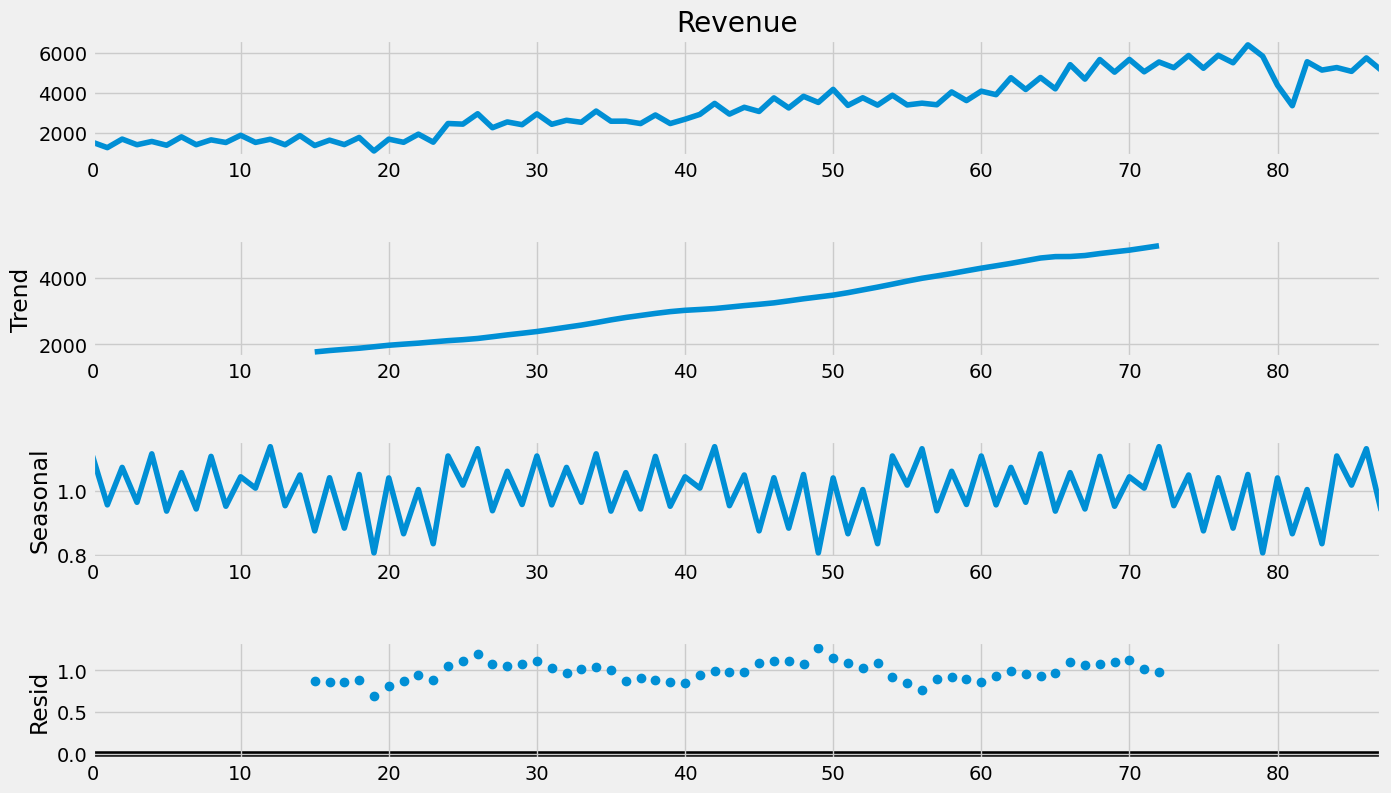

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Revenue"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

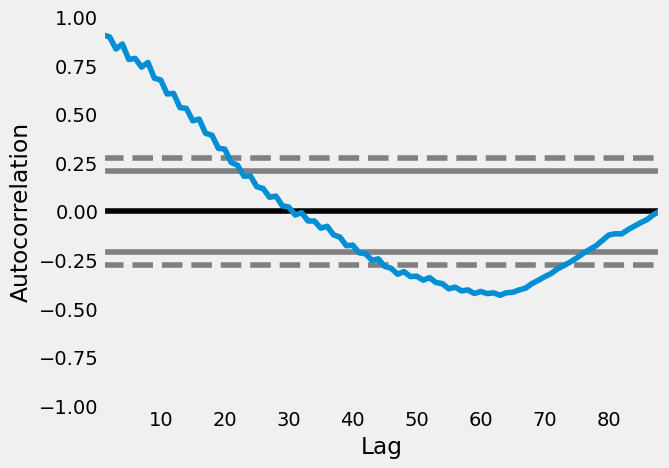

In [ ]:
pd.plotting.autocorrelation_plot(df["Revenue"])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



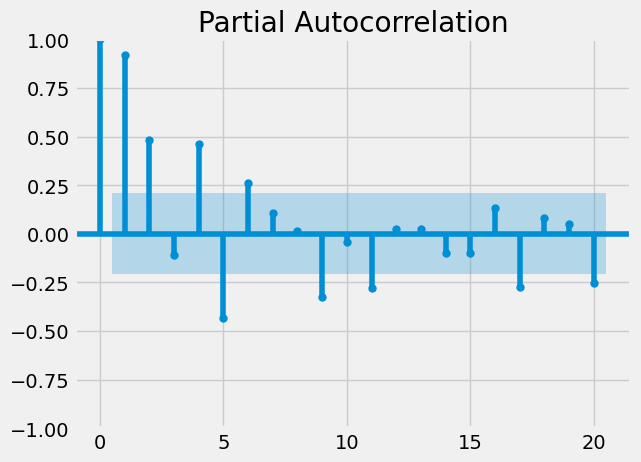

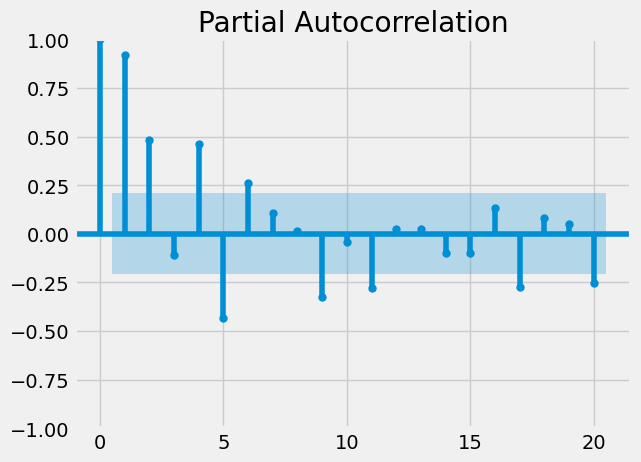

In [ ]:
#terdapat 5 garis/5 musiman p=5
p = 5
d = 1
plot_pacf(df["Revenue"])

In [ ]:
q = 2
from statsmodels.tools.sm_exceptions import ConvergenceWarning
model = sm.tsa.statespace.SARIMAX(df["Revenue"],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Sun, 30 Jul 2023   AIC                           1127.041
Time:                                    07:16:02   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5798      0.387     -4.077      0.000      -2.339      -0.820
ar.L2         -1.4322      0.575   

In [ ]:
predictions = model.predict(len(df), len(df)+7)
print(predictions)

88    6078.681349
89    5186.257681
90    6293.190410
91    5751.738535
92    5911.927595
93    5499.932537
94    6389.557974
95    5728.763360
Name: predicted_mean, dtype: float64


<Axes: >

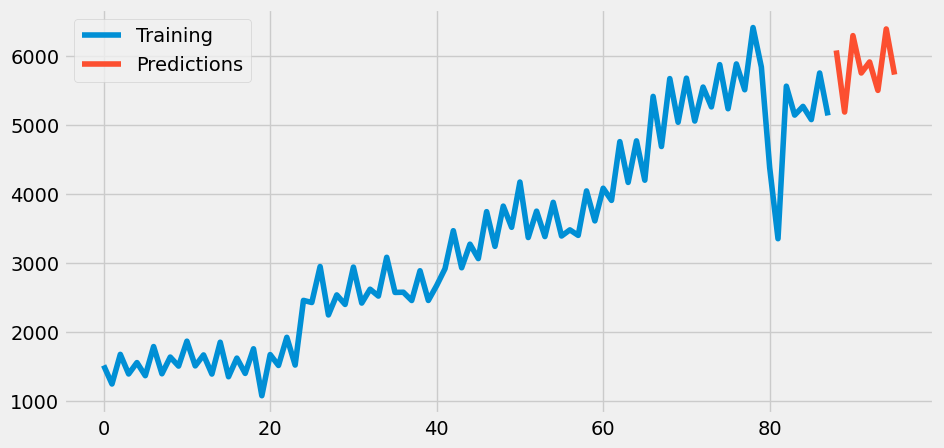

In [ ]:
df["Revenue"].plot(legend=True,
                   label ="Training",
                   figsize=(10,5))
predictions.plot(legend=True, label="Predictions")